# Term Project
## Kinnick Fox
## DSC540

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("all_mtg_cards.csv")

### Remove entries without ID.
Cards without IDs are duplicates or input incorrectly.

In [3]:
len(data)

76436

In [4]:
data1 = data.dropna(subset = ["multiverse_id"])

In [5]:
len(data1)

51694

### Drop duplicates.
Different sets can print the same card with different art which has no purpose in this project.

In [6]:
any(data1.multiverse_id.duplicated())

True

In [7]:
data2 = data1.drop_duplicates(subset="multiverse_id")

In [8]:
len(data2)

51460

In [9]:
data3 = data2.drop_duplicates(subset="name")

In [10]:
len(data3)

25192

### Drop cards thad do not have a mana cost.
Cards without mana cost would thow off the cost metric by virtue of them being seen infinately valuable due to not cost being associated with them.

In [11]:
data4 = data3.dropna(subset = ["mana_cost"])

In [12]:
len(data4)

23914

### Drop non-creature cards.
Ther is not a good comparison between creature ans sorcery/enchanment cards, hence they should be kept seperate.

In [13]:
data5 = data4[data4["type"].str.contains("Creature")]

In [14]:
len(data5)

13490

### Drop columns with low pertinence to project
The dataframe is a little bloated and most variables are null in many columns.

In [15]:
data6 = data5[["name", "multiverse_id", "cmc","text","power","toughness","set"]]
data6["multiverse_id"] = data6["multiverse_id"].astype(int)

C:\Users\minij\AppData\Local\Temp\ipykernel_22540\869447645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6["multiverse_id"] = data6["multiverse_id"].astype(int)


In [16]:
data6

,name,multiverse_id,cmc,text,power,toughness,set
0,Ancestor's Chosen,130550,7.0,First strike (This creature deals combat damag...,4,4,10E
2,Angel of Mercy,129465,5.0,Flying\nWhen Angel of Mercy enters the battlef...,3,3,10E
7,Angelic Wall,129671,2.0,Defender (This creature can't attack.)\nFlying,0,4,10E
10,Aven Cloudchaser,129470,4.0,Flying (This creature can't be blocked except ...,2,2,10E
12,Ballista Squad,129477,4.0,"{X}{W}, {T}: Ballista Squad deals X damage to ...",2,2,10E
...,...,...,...,...,...,...,...
76265,Myriad Construct,491897,4.0,"Kicker {3}\nIf Myriad Construct was kicked, it...",4,4,ZNR
76268,Relic Golem,491900,3.0,Relic Golem can't attack or block unless an op...,6,6,ZNR
76270,Sea Gate Colossus,491902,7.0,This spell costs {1} less to cast for each cre...,7,5,ZNR
76272,Skyclave Sentinel,491904,3.0,Kicker {4} (You may pay an additional {4} as y...,2,3,ZNR


### Make all strings lower in text column
This will make for easier parsing in the future.

In [17]:
all_card_data = data6
all_card_data["text"] = all_card_data["text"].str.lower()
all_card_data["name"] = all_card_data["name"].str.lower()

C:\Users\minij\AppData\Local\Temp\ipykernel_22540\1310963498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_card_data["text"] = all_card_data["text"].str.lower()
C:\Users\minij\AppData\Local\Temp\ipykernel_22540\1310963498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_card_data["name"] = all_card_data["name"].str.lower()


In [18]:
all_card_data

,name,multiverse_id,cmc,text,power,toughness,set
0,ancestor's chosen,130550,7.0,first strike (this creature deals combat damag...,4,4,10E
2,angel of mercy,129465,5.0,flying\nwhen angel of mercy enters the battlef...,3,3,10E
7,angelic wall,129671,2.0,defender (this creature can't attack.)\nflying,0,4,10E
10,aven cloudchaser,129470,4.0,flying (this creature can't be blocked except ...,2,2,10E
12,ballista squad,129477,4.0,"{x}{w}, {t}: ballista squad deals x damage to ...",2,2,10E
...,...,...,...,...,...,...,...
76265,myriad construct,491897,4.0,"kicker {3}\nif myriad construct was kicked, it...",4,4,ZNR
76268,relic golem,491900,3.0,relic golem can't attack or block unless an op...,6,6,ZNR
76270,sea gate colossus,491902,7.0,this spell costs {1} less to cast for each cre...,7,5,ZNR
76272,skyclave sentinel,491904,3.0,kicker {4} (you may pay an additional {4} as y...,2,3,ZNR


In [19]:
from bs4 import BeautifulSoup

In [20]:
html = open("Most Played Cards - MTGStocks.htm", "r", encoding = "utf8")
raw = BeautifulSoup(html)
html.close()

In [21]:
tables = raw.find_all("table")

#### Six tables exist on this webpage so each will need to be turned into a dataframe and then appended.

In [22]:
legacy = pd.read_html(str(tables[0]))[0]

In [23]:
legacy

,0,1,2,3
0,1,Force of Will,$69.85,780 copies
1,2,Brainstorm,$1.08,667 copies
2,3,Ponder,$2.58,618 copies
3,4,Lotus Petal,$24.95,534 copies
4,5,Swords to Plowshares,$0.61,486 copies
5,6,Ancient Tomb,$79.99,422 copies
6,7,Flooded Strand,$36.05,416 copies
7,8,Wasteland,$24.92,401 copies
8,9,Surgical Extraction,$3.86,400 copies
9,10,Misty Rainforest,$21.00,372 copies


In [24]:
vintage = pd.read_html(str(tables[1]))[0]

In [25]:
vintage

,0,1,2,3
0,1,Force of Will,$69.85,896 copies
1,2,Leyline of the Void,$8.50,660 copies
2,3,Wasteland,$24.92,597 copies
3,4,Urza's Saga,$30.40,584 copies
4,5,Ancient Tomb,$79.99,409 copies
5,6,Flusterstorm,$28.99,409 copies
6,7,Force of Negation,$33.60,361 copies
7,8,Underground Sea,$852.49,300 copies
8,9,Swords to Plowshares,$0.61,299 copies
9,10,The Tabernacle at Pendrell Vale,$4374.99,292 copies


In [26]:
modern = pd.read_html(str(tables[2]))[0]

In [27]:
modern

,0,1,2,3
0,1,Lightning Bolt,$0.49,1212 copies
1,2,Scalding Tarn,$22.80,973 copies
2,3,"Ragavan, Nimble Pilferer",$58.00,830 copies
3,4,Misty Rainforest,$21.00,804 copies
4,5,Fury,$37.99,776 copies
5,6,Wooded Foothills,$38.94,751 copies
6,7,Bloodstained Mire,$38.46,749 copies
7,8,Fable of the Mirror-Breaker,$25.00,690 copies
8,9,Spell Pierce,$0.25,659 copies
9,10,Blood Moon,$10.83,655 copies


In [28]:
standard = pd.read_html(str(tables[3]))[0]

In [29]:
standard

,0,1,2,3
0,1,Cut Down,$0.19,360 copies
1,2,Reckoner Bankbuster,$4.00,359 copies
2,3,Fable of the Mirror-Breaker,$25.00,336 copies
3,4,Go for the Throat,$0.31,327 copies
4,5,"Sheoldred, the Apocalypse",$70.00,283 copies
5,6,Bloodtithe Harvester,$0.30,271 copies
6,7,Blackcleave Cliffs,$3.00,267 copies
7,8,Haunted Ridge,$12.00,261 copies
8,9,Duress,$0.15,253 copies
9,10,Sulfurous Springs,$3.35,200 copies


In [30]:
pioneer = pd.read_html(str(tables[4]))[0]

In [31]:
pioneer

,0,1,2,3
0,1,Thoughtseize,$16.89,1029 copies
1,2,Fatal Push,$2.34,933 copies
2,3,Fable of the Mirror-Breaker,$25.00,826 copies
3,4,Rending Volley,$3.53,618 copies
4,5,Bonecrusher Giant,$0.70,518 copies
5,6,Llanowar Elves,$0.31,498 copies
6,7,Elvish Mystic,$0.63,493 copies
7,8,Duress,$0.15,477 copies
8,9,"Sheoldred, the Apocalypse",$70.00,455 copies
9,10,Blood Crypt,$19.95,443 copies


In [32]:
pauper = pd.read_html(str(tables[5]))[0]

In [33]:
pauper

,0,1,2,3
0,1,Snow-Covered Island,$0.99,436 copies
1,2,Relic of Progenitus,$4.99,401 copies
2,3,Counterspell,$1.00,364 copies
3,4,Hydroblast,$1.42,351 copies
4,5,Blue Elemental Blast,$0.30,350 copies
5,6,Dust to Dust,$5.56,318 copies
6,7,Snap,$0.50,252 copies
7,8,Lightning Bolt,$0.49,246 copies
8,9,Pyroblast,$5.28,224 copies
9,10,Preordain,$0.55,215 copies


### 1. Merge tables

In [34]:
data = legacy.append(vintage, ignore_index= True)

C:\Users\minij\AppData\Local\Temp\ipykernel_22540\1695491460.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = legacy.append(vintage, ignore_index= True)


In [35]:
data = data.append(modern, ignore_index= True)

C:\Users\minij\AppData\Local\Temp\ipykernel_22540\884958552.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(modern, ignore_index= True)


In [36]:
data = data.append(standard, ignore_index= True)

C:\Users\minij\AppData\Local\Temp\ipykernel_22540\1498384311.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(standard, ignore_index= True)


In [37]:
data = data.append(pioneer, ignore_index= True)

C:\Users\minij\AppData\Local\Temp\ipykernel_22540\1080391883.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pioneer, ignore_index= True)


In [38]:
data = data.append(pauper, ignore_index= True)

C:\Users\minij\AppData\Local\Temp\ipykernel_22540\3745062557.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pauper, ignore_index= True)


In [39]:
data

,0,1,2,3
0,1,Force of Will,$69.85,780 copies
1,2,Brainstorm,$1.08,667 copies
2,3,Ponder,$2.58,618 copies
3,4,Lotus Petal,$24.95,534 copies
4,5,Swords to Plowshares,$0.61,486 copies
...,...,...,...,...
295,46,Voldaren Epicure,$0.25,134 copies
296,47,Myr Enforcer,$0.79,132 copies
297,48,Drossforge Bridge,$0.37,128 copies
298,49,Sacred Cat,$0.49,126 copies


### 2. Change table names

In [40]:
data.columns = ["rank", "name", "cost", "copies"]

In [41]:
data

,rank,name,cost,copies
0,1,Force of Will,$69.85,780 copies
1,2,Brainstorm,$1.08,667 copies
2,3,Ponder,$2.58,618 copies
3,4,Lotus Petal,$24.95,534 copies
4,5,Swords to Plowshares,$0.61,486 copies
...,...,...,...,...
295,46,Voldaren Epicure,$0.25,134 copies
296,47,Myr Enforcer,$0.79,132 copies
297,48,Drossforge Bridge,$0.37,128 copies
298,49,Sacred Cat,$0.49,126 copies


### 3. Transform rank variable to score

In [42]:
data["rank"] = data["rank"].apply(lambda x: 101 - x)

In [43]:
data.rename(columns= {"rank":"score"}, inplace=True)

In [44]:
data

,score,name,cost,copies
0,100,Force of Will,$69.85,780 copies
1,99,Brainstorm,$1.08,667 copies
2,98,Ponder,$2.58,618 copies
3,97,Lotus Petal,$24.95,534 copies
4,96,Swords to Plowshares,$0.61,486 copies
...,...,...,...,...
295,55,Voldaren Epicure,$0.25,134 copies
296,54,Myr Enforcer,$0.79,132 copies
297,53,Drossforge Bridge,$0.37,128 copies
298,52,Sacred Cat,$0.49,126 copies


### 4. Combine duplicates scores while dropping duplicate rows

In [45]:
data["tot_score"] = data.groupby("name")["score"].transform("sum")

In [46]:
data["score"] = data["tot_score"]

In [47]:
data = data.drop_duplicates(subset = "name")

In [48]:
data

,score,name,cost,copies,tot_score
0,200,Force of Will,$69.85,780 copies,200
1,174,Brainstorm,$1.08,667 copies,174
2,98,Ponder,$2.58,618 copies,98
3,97,Lotus Petal,$24.95,534 copies,97
4,188,Swords to Plowshares,$0.61,486 copies,188
...,...,...,...,...,...
295,55,Voldaren Epicure,$0.25,134 copies,55
296,54,Myr Enforcer,$0.79,132 copies,54
297,53,Drossforge Bridge,$0.37,128 copies,53
298,52,Sacred Cat,$0.49,126 copies,52


### 5. Drop out of scope columns

In [49]:
top_card_data = data.drop(["copies","tot_score"], axis = 1)

In [50]:
top_card_data["name"] = top_card_data["name"].str.lower()  

In [51]:
top_card_data.index = range(len(top_card_data))

In [52]:
top_card_data

,score,name,cost
0,200,force of will,$69.85
1,174,brainstorm,$1.08
2,98,ponder,$2.58
3,97,lotus petal,$24.95
4,188,swords to plowshares,$0.61
...,...,...,...
234,55,voldaren epicure,$0.25
235,54,myr enforcer,$0.79
236,53,drossforge bridge,$0.37
237,52,sacred cat,$0.49


#### Ethical implications: I don't believe any serious ethical implications need to be considered in this project. Wizards of the Coast, the compnay behind Magic the Gathering, carfully balances cards so many remain viable options for players. This project has very little possibility of uncovering something so imbalanced that it would hurt the parent company.

In [53]:
from mtgsdk import Card
import numpy as np

##### Test API call

In [54]:
all_card_data.index[all_card_data["name"].str.contains("myr enforcer")][0]

29356

In [55]:
myr = Card.find(all_card_data.index[all_card_data["name"].str.contains("myr enforcer")][0])

TypeError: __str__ returned non-string (type bytes)

In [ ]:
print("{}\n{}\n{}\n{}\n{}\n{}\n{}".format
      (myr.name,myr.type,myr.cmc,myr.text,myr.power,myr.toughness,myr.legalities))

##### Step 1: Change text to lower. This will keep everything standard between the data sources.

In [ ]:
myr.text = myr.text.lower()

In [ ]:
myr.text

##### Step 2: Combine power and toughness. This is done to have get a general idea of what the card provides to the player and will be used to create a score attribute for the card.

In [ ]:
myr.score = int(myr.power) + int(myr.toughness)

In [ ]:
myr.score

##### Step 3: Count card abilities in text. By creating a list of some of the most common abilities found on cards, we are able to find how often these abilities appear on cards.

In [ ]:
# abilities cannot be assigned different scores due to personal bias
abilities = ["affinity","deathtouch","defender","double strike","enchant","equip","first strike","flash",
"flying","haste","hexproof","indestructible","lifelink","menace","reach","trample","vigilance"]

In [ ]:
ability_count = 0
for ability in abilities:
    ability_count = ability_count + myr.text.count(ability)

In [ ]:
ability_count

##### Step 4: Quantify final score. Combining previous steps into one to create one score attribute.

In [ ]:
# the main factors in score will be power, toughness, cmc (cost), and abilities
myr.score = int(myr.power) + int(myr.toughness) + int(ability_count) - int(myr.cmc) 

In [ ]:
myr.score

##### Step 5: Create card query. This will allow a string to be entered and card to be returned with the score attribute. The plan will be to use this function on the most played creature cards from the web database.

In [ ]:
abilities = ["affinity","deathtouch","defender","double strike","enchant","equip","first strike","flash",
"flying","haste","hexproof","indestructible","lifelink","menace","reach","trample","vigilance"]

def score_card(name):
    temp = np.nan
    ability_count = 0

    temp = Card.find(all_card_data.index[all_card_data["name"].str.contains(name)][0])

    for ability in abilities:
        ability_count = ability_count + str(temp.text).count(ability)

    ability_count = ability_count*2 # abilities are powerful and should atleast be worth 2 points

    temp.score = int(temp.power) + int(temp.toughness) + int(ability_count) - int(temp.cmc)

    return temp


In [ ]:
myr_test = score_card("myr enforcer")

In [ ]:
ballista = score_card("ballista squad")

In [ ]:
ballista.score

In [ ]:
myr_test.score

# ***NEW CONTENT BEGINS HERE***

In [56]:
api_data = Card.all()

In [57]:
len(api_data)

78636

In [58]:
api_data[1]

In [59]:
api_data[2].color_identity

['W']

In [60]:
x = []
for card in api_data:
    x.append([card.multiverse_id,card.color_identity,card.rarity])
api_df = pd.DataFrame(x,columns=["multiverse_id","color","rarity"])

In [61]:
api_df

,multiverse_id,color,rarity
0,130550,[W],Uncommon
1,None,[W],Uncommon
2,129465,[W],Uncommon
3,None,[W],Uncommon
4,129711,[W],Common
...,...,...,...
78631,None,[U],Common
78632,None,[B],Uncommon
78633,None,[R],Common
78634,None,[G],Uncommon


In [62]:
dummies = pd.get_dummies(api_df.color.astype(str), prefix="color")

In [63]:
dummies

,color_None,"color_['B', 'G', 'R', 'U', 'W']","color_['B', 'G', 'R', 'U']","color_['B', 'G', 'R', 'W']","color_['B', 'G', 'R']","color_['B', 'G', 'U', 'W']","color_['B', 'G', 'U']","color_['B', 'G', 'W']","color_['B', 'G']","color_['B', 'R', 'U', 'W']",...,"color_['G', 'U']","color_['G', 'W']",color_['G'],"color_['R', 'U', 'W']","color_['R', 'U']","color_['R', 'W']",color_['R'],"color_['U', 'W']",color_['U'],color_['W']
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
78632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
78634,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
api_df = api_df.drop('color',axis=1)
api_df = api_df.join(dummies)

In [65]:
api_df

,multiverse_id,rarity,color_None,"color_['B', 'G', 'R', 'U', 'W']","color_['B', 'G', 'R', 'U']","color_['B', 'G', 'R', 'W']","color_['B', 'G', 'R']","color_['B', 'G', 'U', 'W']","color_['B', 'G', 'U']","color_['B', 'G', 'W']",...,"color_['G', 'U']","color_['G', 'W']",color_['G'],"color_['R', 'U', 'W']","color_['R', 'U']","color_['R', 'W']",color_['R'],"color_['U', 'W']",color_['U'],color_['W']
0,130550,Uncommon,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,None,Uncommon,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,129465,Uncommon,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,None,Uncommon,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,129711,Common,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78631,None,Common,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
78632,None,Uncommon,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78633,None,Common,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
78634,None,Uncommon,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [66]:
dummies = pd.get_dummies(api_df.rarity.astype(str),prefix="rarity")

In [67]:
api_df = api_df.drop('rarity',axis=1)
api_df = api_df.join(dummies)

In [76]:
api_df

,multiverse_id,color_None,"color_['B', 'G', 'R', 'U', 'W']","color_['B', 'G', 'R', 'U']","color_['B', 'G', 'R', 'W']","color_['B', 'G', 'R']","color_['B', 'G', 'U', 'W']","color_['B', 'G', 'U']","color_['B', 'G', 'W']","color_['B', 'G']",...,color_['R'],"color_['U', 'W']",color_['U'],color_['W'],rarity_Bonus,rarity_Common,rarity_Mythic,rarity_Rare,rarity_Special,rarity_Uncommon
0,130550,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,None,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,129465,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,None,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,129711,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78631,None,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
78632,None,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
78633,None,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
78634,None,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [117]:
import os
import sqlite3
import matplotlib.pyplot as plt

In [70]:
os.getcwd()+"\\all.db"

'C:\\Users\\minij\\DSC540 Data Prep\\Term Project\\all.db'

In [71]:
conn = sqlite3.connect(os.getcwd()+"\\all.db")
all_card_data.to_sql(name="all_cards",con=conn)

13490

In [72]:
card_data = pd.read_sql('SELECT * FROM all_cards', conn)

In [89]:
conn = sqlite3.connect(os.getcwd()+"\\all.db")
api_df.to_sql(name="api_cards",con=conn)

78636

In [90]:
color_data = pd.read_sql('SELECT * FROM api_cards', conn)

In [91]:
conn = sqlite3.connect(os.getcwd()+"\\all.db")
top_data.to_sql(name="top_cards",con=conn)

ValueError: Table 'top_cards' already exists.

In [92]:
top_data = pd.read_sql('SELECT * FROM top_cards', conn)

In [96]:
card_data = card_data.drop("index", axis=1)

In [99]:
color_data = color_data.drop("index", axis=1)

In [108]:
color_data = color_data.dropna(subset = ["multiverse_id"])

In [109]:
color_data["multiverse_id"] = color_data["multiverse_id"].astype(int)

C:\Users\minij\AppData\Local\Temp\ipykernel_22540\1726967343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  color_data["multiverse_id"] = color_data["multiverse_id"].astype(int)


In [162]:
card_color_df = card_data.merge(color_data,on="multiverse_id",how="left")

In [169]:
card_color_df

,name,multiverse_id,cmc,text,power,toughness,set,color_None,"color_['B', 'G', 'R', 'U', 'W']","color_['B', 'G', 'R', 'U']",...,color_['R'],"color_['U', 'W']",color_['U'],color_['W'],rarity_Bonus,rarity_Common,rarity_Mythic,rarity_Rare,rarity_Special,rarity_Uncommon
0,ancestor's chosen,130550,7,first strike (this creature deals combat damag...,4,4,10E,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,angel of mercy,129465,5,flying\nwhen angel of mercy enters the battlef...,3,3,10E,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,angelic wall,129671,2,defender (this creature can't attack.)\nflying,0,4,10E,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,aven cloudchaser,129470,4,flying (this creature can't be blocked except ...,2,2,10E,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,ballista squad,129477,4,"{x}{w}, {t}: ballista squad deals x damage to ...",2,2,10E,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614,myriad construct,491897,4,"kicker {3}\nif myriad construct was kicked, it...",4,4,ZNR,1,0,0,...,0,0,0,0,0,0,0,1,0,0
13615,relic golem,491900,3,relic golem can't attack or block unless an op...,6,6,ZNR,1,0,0,...,0,0,0,0,0,0,0,0,0,1
13616,sea gate colossus,491902,7,this spell costs {1} less to cast for each cre...,7,5,ZNR,1,0,0,...,0,0,0,0,0,1,0,0,0,0
13617,skyclave sentinel,491904,3,kicker {4} (you may pay an additional {4} as y...,2,3,ZNR,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [171]:
card_color_df = card_color_df[card_color_df['power'].apply(lambda x: str(x).isdigit())]

In [172]:
card_color_df = card_color_df[card_color_df['toughness'].apply(lambda x: str(x).isdigit())]

In [173]:
card_color_df.power = card_color_df.power.astype(int)

In [174]:
card_color_df.toughness = card_color_df.toughness.astype(int)

In [175]:
card_color_df.cmc = card_color_df.cmc.astype(int)

In [176]:
card_color_df["combined_stats"] = card_color_df.power + card_color_df.toughness

In [177]:
card_color_df

,name,multiverse_id,cmc,text,power,toughness,set,color_None,"color_['B', 'G', 'R', 'U', 'W']","color_['B', 'G', 'R', 'U']",...,"color_['U', 'W']",color_['U'],color_['W'],rarity_Bonus,rarity_Common,rarity_Mythic,rarity_Rare,rarity_Special,rarity_Uncommon,combined_stats
0,ancestor's chosen,130550,7,first strike (this creature deals combat damag...,4,4,10E,0,0,0,...,0,0,1,0,0,0,0,0,1,8
1,angel of mercy,129465,5,flying\nwhen angel of mercy enters the battlef...,3,3,10E,0,0,0,...,0,0,1,0,0,0,0,0,1,6
2,angelic wall,129671,2,defender (this creature can't attack.)\nflying,0,4,10E,0,0,0,...,0,0,1,0,1,0,0,0,0,4
3,aven cloudchaser,129470,4,flying (this creature can't be blocked except ...,2,2,10E,0,0,0,...,0,0,1,0,1,0,0,0,0,4
4,ballista squad,129477,4,"{x}{w}, {t}: ballista squad deals x damage to ...",2,2,10E,0,0,0,...,0,0,1,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614,myriad construct,491897,4,"kicker {3}\nif myriad construct was kicked, it...",4,4,ZNR,1,0,0,...,0,0,0,0,0,0,1,0,0,8
13615,relic golem,491900,3,relic golem can't attack or block unless an op...,6,6,ZNR,1,0,0,...,0,0,0,0,0,0,0,0,1,12
13616,sea gate colossus,491902,7,this spell costs {1} less to cast for each cre...,7,5,ZNR,1,0,0,...,0,0,0,0,1,0,0,0,0,12
13617,skyclave sentinel,491904,3,kicker {4} (you may pay an additional {4} as y...,2,3,ZNR,1,0,0,...,0,0,0,0,1,0,0,0,0,5


In [113]:
top_card_data = top_data.merge(card_color_df,on="name",how="inner")

In [132]:
top_card_data["cost"] = top_card_data["cost"].apply(lambda x:x.strip("$"))
top_card_data["cost"] = top_card_data["cost"].astype(float)

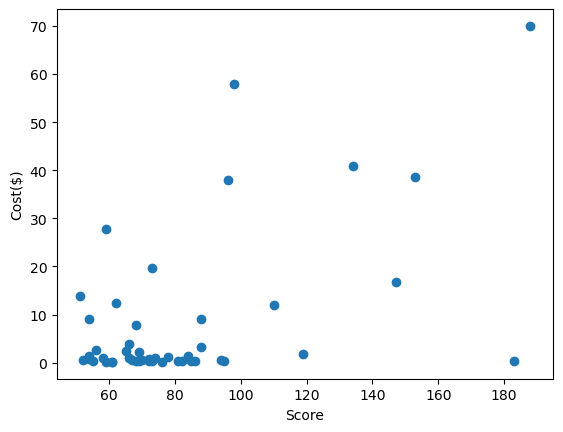

In [134]:
plt.scatter(top_card_data.score,top_card_data.cost)
plt.xlabel("Score")
plt.ylabel("Cost($)")
plt.show()

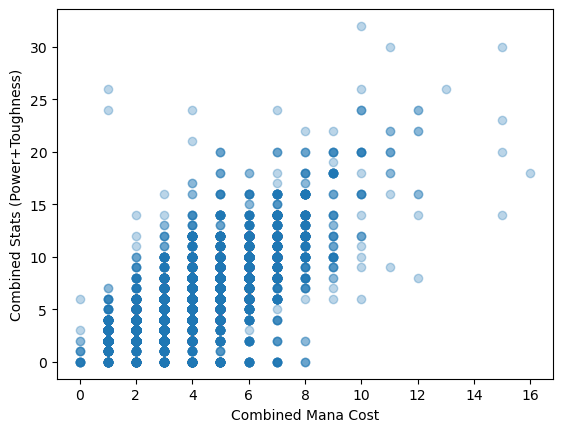

In [180]:
plt.scatter(card_color_df.cmc, card_color_df.combined_stats,alpha=0.3)
plt.xlabel("Combined Mana Cost")
plt.ylabel("Combined Stats (Power+Toughness)")
plt.show()

# Conclusion

#### This project contained many challenges that had to be overcome in order to reach the end goal. Cleaning the data was by far the most important part of this project with transforming data into new and helpful features, as seen with score and combined statistics, was also highly important. Overall, the website data produced the least helpful results for this project but still provided some interesting information. The inner-joined dataset with data from the most played cards did not contain enough cards to really gleam much information from the scatter plot above. It is interesting however that the most expensive card is also the highest scoring. This appears to be merely coincidence and does not necessarily mean that the higher a card scores, the more expensive it will be. That brings us to our second visualization depicting the combined mana cost (CMC), or the total mana cost of the card regardless of what color the mana is, and the combined statistics of the card, that being the card’s power added to its toughness. This visualization gave some insight in the trend of CMC to combined statistics of a card. It shows a fairly clear positive trend of cards with a higher mana cost having higher power and toughness. I still don’t believe this research or findings have any negative ethical implications to speak of. Logically, it makes sense that a card that is conventionally stronger than another, by having a higher combined statistic, would also have a higher mana cost to play.